In [1]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings
from IPython.display import HTML
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as sm

# Set any preferences you want for the notebook
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set the home directory to the main repository page
os.chdir('..')
os.listdir()

['.DS_Store',
 'docs',
 'README.md',
 '.gitignore',
 '.ipynb_checkpoints',
 '.git',
 'data',
 'notebooks']

## Part 1 - Data Analysis

1. Load and clean the NYC Yellow Taxi Trip ONLY for January 2024 (data can be found HERE).

In [3]:
# Read in the NYC Yellow Taxi Trip January 2024 data
# Note this was downloaded from this link: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page
df = pd.read_parquet("data/yellow_tripdata_2024-01.parquet")

# Show the first 2 rows
df.head(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.000,1.720,1.000,N,186,79,2,17.700,1.000,0.500,0.000,0.000,1.000,22.700,2.500,0.000
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.000,1.800,1.000,N,140,236,1,10.000,3.500,0.500,3.750,0.000,1.000,18.750,2.500,0.000


In [4]:
print(f"There are {df.shape[0]} rows of data.")
print(f"There are {df.shape[1]} columns of data.")

# Clean the data
# Check that each column has the correct data type
df.dtypes

There are 2964624 rows of data.
There are 19 columns of data.


VendorID                          int32
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int32
DOLocationID                      int32
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
Airport_fee                     float64
dtype: object

2. Conduct exploratory data analysis, focusing on summarising daily trip volume trends

In [19]:
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,trip_speed
count,2964624.000,2964624,2964624,2824462.000,2964624.000,2824462.000,2964624.000,2964624.000,2964624.000,2964624.000,2964624.000,2964624.000,2964624.000,2964624.000,2964624.000,2964624.000,2824462.000,2824462.000,2964624
mean,1.754,2024-01-17 00:46:36.431092,2024-01-17 01:02:13.208130,1.339,3.652,2.069,166.018,165.117,1.161,18.175,1.452,0.483,3.336,0.527,0.976,26.802,2.256,0.141,0 days 00:15:36.777037
min,1.000,2002-12-31 22:59:39,2002-12-31 23:05:41,0.000,0.000,1.000,1.000,1.000,0.000,-899.000,-7.500,-0.500,-80.000,-80.000,-1.000,-900.000,-2.500,-1.750,-1 days +23:46:26
25%,2.000,2024-01-09 15:59:19.750000,2024-01-09 16:16:23,1.000,1.000,1.000,132.000,114.000,1.000,8.600,0.000,0.500,1.000,0.000,1.000,15.380,2.500,0.000,0 days 00:07:09
50%,2.000,2024-01-17 10:45:37.500000,2024-01-17 11:03:51.500000,1.000,1.680,1.000,162.000,162.000,1.000,12.800,1.000,0.500,2.700,0.000,1.000,20.100,2.500,0.000,0 days 00:11:38
75%,2.000,2024-01-24 18:23:52.250000,2024-01-24 18:40:29,1.000,3.110,1.000,234.000,234.000,1.000,20.500,2.500,0.500,4.120,0.000,1.000,28.560,2.500,0.000,0 days 00:18:41
max,6.000,2024-02-01 00:01:15,2024-02-02 13:56:52,9.000,312722.300,99.000,265.000,265.000,4.000,5000.000,14.250,4.000,428.000,115.920,1.000,5000.000,2.500,1.750,6 days 13:35:24
std,0.433,NaN,NaN,0.850,225.463,9.823,63.624,69.315,0.581,18.950,1.804,0.118,3.897,2.128,0.218,23.386,0.823,0.488,0 days 00:34:51.063215


3. Create visualisations for:
 - Daily trip distance distribution
 - Average fare amount by day of the week
 - Top 5 pickup locations and how they change across days of the week

<Axes: >

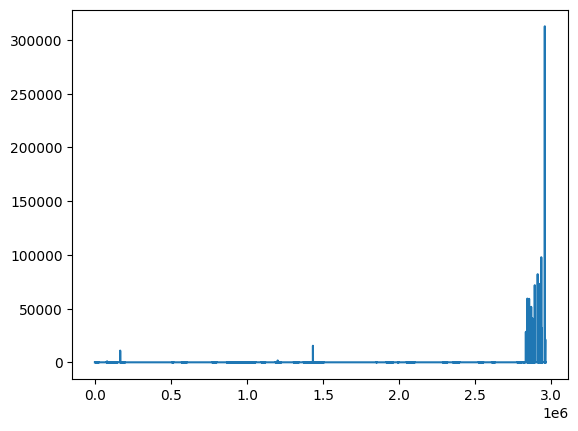

In [5]:
# Daily Trip Distance Distribution
#sns.displot(df, x="trip_distance").set(title='Distribution of Trip Distance')
df['trip_distance'].plot()

In [6]:
# Create a day of the week column using pickup datetime column
df['day_of_week'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.day_name()

# Make a pivot table that summarises fare amount by day of week
# NOTE: Not the total amount but just the base fare
df_summary = pd.pivot_table(df, values = 'fare_amount', index = 'day_of_week', aggfunc = 'mean')
df_summary

,fare_amount
day_of_week,
Friday,17.866
Monday,19.359
Saturday,16.972
Sunday,18.379
Thursday,18.279
Tuesday,18.280
Wednesday,18.149


<Axes: ylabel='day_of_week-PULocationID'>

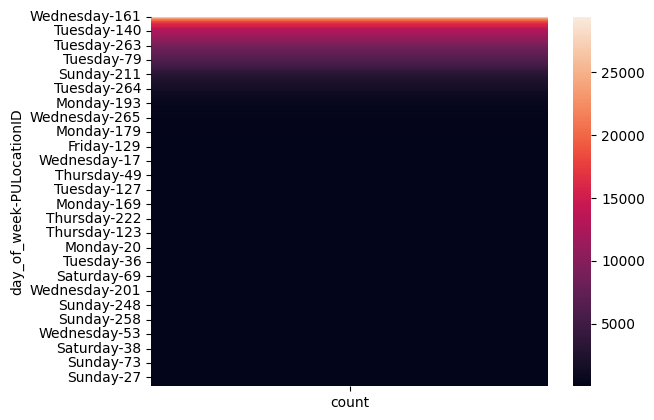

In [7]:
# Find the top 5 pickup locations each week

sns.heatmap(pd.DataFrame(df[['day_of_week', 'PULocationID']].value_counts()))

4. Compute average trip speed for:
 - Each day of the week
 - Each day of the week and trip distance (e.g., short, medium, long)

In [8]:
# Note: I interpret trip speed to mean duration of trip, not speed of trip in miles per hour.

df['trip_speed'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
pd.pivot_table(df, index = 'day_of_week', values = 'trip_speed', aggfunc = 'mean')

,trip_speed
day_of_week,
Friday,0 days 00:15:47.499302
Monday,0 days 00:15:40.567604
Saturday,0 days 00:14:45.992340
Sunday,0 days 00:14:10.015952
Thursday,0 days 00:16:17.750835
Tuesday,0 days 00:16:02.098066
Wednesday,0 days 00:16:08.284767


In [17]:
# Need to bucket trip distance into short, medium and long
df['trip_distance_label_bins'] = pd.qcut(df['trip_distance'],3,labels=["short", "medium", "long"])
pd.pivot_table(df, index = 'day_of_week', columns = 'trip_distance_label_bins', values = 'trip_speed', aggfunc = ['mean', 'count'])

mean                         \
trip_distance_label_bins                  short                 medium   
day_of_week                                                              
Friday                   0 days 00:07:24.350961 0 days 00:12:55.569948   
Monday                   0 days 00:07:17.054939 0 days 00:12:10.433610   
Saturday                 0 days 00:07:26.466270 0 days 00:12:35.238176   
Sunday                   0 days 00:06:42.260762 0 days 00:11:29.605867   
Thursday                 0 days 00:07:39.667917 0 days 00:13:26.322535   
Tuesday                  0 days 00:07:50.558241 0 days 00:13:30.526990   
Wednesday                0 days 00:07:43.015180 0 days 00:13:40.961723   

                                                  count                  
trip_distance_label_bins                   long   short  medium    long  
day_of_week                                                              
Friday                   0 days 00:27:35.937703  141403  134191  132994  
Monday                   0 days 00:26:23.608728  134348  127174  146755  
Saturday                 0 days 00:24:53.745286  146548  138771  135839  
Sunday                   0 days 00:23:23.378827  112267  105594  121451  
Thursday                 0 days 00:27:59.719330  145488  141237  141868  
Tuesday                  0 days 00:27:45.481641  165253  150498  147913  
Wednesday                0 days 00:27:49.211740  173186  162788  159058

## Part 2

1. **Analyse the relationship between trip fare and other factors that may explain the trip fare variability**

In [18]:
# Lets initally look at a simple correlation matrix
df[['fare_amount', 'total_amount','trip_distance', 'trip_speed', 'passenger_count', 'Airport_fee']].corr()

,fare_amount,total_amount,trip_distance,trip_speed,passenger_count,Airport_fee
fare_amount,1.000,0.979,0.016,0.247,0.036,0.571
total_amount,0.979,1.000,0.016,0.244,0.035,0.613
trip_distance,0.016,0.016,1.000,0.005,0.012,0.237
trip_speed,0.247,0.244,0.005,1.000,0.022,0.145
passenger_count,0.036,0.035,0.012,0.022,1.000,0.018
Airport_fee,0.571,0.613,0.237,0.145,0.018,1.000


In [15]:
# We could also do a cursory multi-linear regression model
result = sm.ols(formula="fare_amount ~ trip_distance + passenger_count + payment_type + Airport_fee", data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                 4.045e+05
Date:                Thu, 17 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:30:54   Log-Likelihood:            -1.1713e+07
No. Observations:             2824462   AIC:                         2.343e+07
Df Residuals:                 2824457   BIC:                         2.343e+07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          17.6581      0.027    656.880      0.000      17.605      17.711
trip_distance       0.2729      0.001    353.205      0.000       0.271       0.274
passenger_count     0.5874      0.011     54.828      0.000       0.566       0.608
payment_type       -3.4364      0.017   -201.044      0.000      -3.470      -3.403
Airport_fee        20.8239      0.019   1083.112      0.000      20.786      20.862
==============================================================================
Omnibus:                  6929374.168   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   15661953504483.711
Skew:                          24.150   Prob(JB):                         0.00
Kurtosis:                   11539.044   Cond. No.                         42.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Note: If I had more time I would do a full model, properly adding categorical variables using one-hot encoding, using a forward/backward selection to ensure significant variables are in the model. Would check assumptions are met, etc.

2. **Based on your findings from Part 1 and the above analysis, list the key takeaways for Bikes-R-Us**

 - The demand for short trips is approximately the same as both medium and long trips
 - Airport fees significantly have strong positive correlations with fare cost
 - As expected, trip distribution is heavily skewed
 - Fare distances and amounts are relatively stable over the week with Friday and Saturday having the lowest average fare cost.
 - Pickup locations are heavily skewed following a pareto distribution and there is opportunity to focus on key areas and routes.

3. **Discuss how external factors (weather, events) might impact taxi demand:**
 - List potential effects on trip volume and characteristics

Wet weather may make people more inclined to increase taxi demand given they may be more likely to not want to walk or wait for pubic transport. It could also reduce demand as people cancel activies if they were based outside.

We could look at events data (e.g. concerts, sports games, festivals, etc) and understand the demand for customers to use taxis to get to the events. It may be that some events are more inclined have more taxi demand if there isn't suitable transport alternatives.

 - Outline a method to incorporate such data into your analysis

Firstly we would need to collect weather and events data and append it to the dataset.
Secondly, we could explore the relationship of these events against key metrics such as trip demand, fares, etc.
Thirdly, if we incorporated this into the model we would be able to derive a coefficient that would show whether it affected trip demand.
For example if our outcome variable was trip demand, we could create a boolean variable for weather=rainy and show how this impacts the demand for taxis.

## Part 3

As previously mentioned, Bikes-R-Us has hired Mandala to help them enter the New York City market. They want to compete with taxis but not with Uber. To help your team to develop a data-driven strategy for Bikes-R-Us, you have been tasked to:
1. Formulate a problem statement - what is the main question we are looking to answer?

**The main question we are looking to answer is under what conditions and scenarios Bikes-R-Us are able to go to market in New York City which make them most successful.**

2. Break the statement into 3-5 sub-questions that would need to be answered to solve the problem. For each of the sub-questions:
 - Propose an initial hypothesis.
 - Describe the required analysis to test these hypotheses and identify supporting data sources.
Remember to clearly explain your thought process throughout.

**Initial Hypothesis:** Bikes-R-Us should focus on short trips in predefined areas with the potential to carve out a specialty niche.

Note these are relatively MECE.
**Sub-Question 1:** What is the upper limit of a trip distance that customers would be comfortable with for a bike taxi service?
*Inital hypothesis:* Short
**Sub-Question 2:** What locations do customers have both the demand and affluence to afford a service that Bikes-R-Us would provide?
*Inital hypothesis:* High income areas within denser populations that allow for short trips.
**Sub-Question 3:** Under what conditions do Bikes-R-Us provide an optimal alternative to other transportation options?
E.g. Can they carry luggage? If not, then maybe the Airport is a poor location given travellers more often than not have suitcases.
*Inital hypothesis:* Areas that are traditionally underserved by taxis and other public transportation options.